# PLINK GWAS + visualization

#### User supplied variables

In [1]:
PLINKCMD = '/usr/local/bin/plink-1.90b6.9 '
PLINK_PREFIX = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05'

FILE_COVAR = '/mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt'
COVAR_STR = 'PC01,PC02,PC03'

DIR_ASSOC = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/assoc_maf_05'
MODEL_NAME = 'psp_adsp.common_PCA.pass_qc.model_0.maf_05'

!mkdir -p {DIR_ASSOC}

#### imports & setup derived variables

In [2]:
# !pip install qqman
from qqman import qqman
import os

file_plink_assoc = os.path.join(DIR_ASSOC, MODEL_NAME)
out_manhattan = os.path.join(DIR_ASSOC, MODEL_NAME+'.Manhattan.png')
out_qqplot = os.path.join(DIR_ASSOC, MODEL_NAME+'.qqplot.png')

<br>  

### Run PLINK GWAS

In [3]:
if not os.path.isfile(file_plink_assoc+'.assoc'):
    print('running PLINK command\n')
    !mkdir -p {DIR_ASSOC}
    
    !{PLINKCMD} --bfile {PLINK_PREFIX} \
            --assoc \
            --covar {FILE_COVAR} --covar-name {COVAR_STR} \
            --out {file_plink_assoc} 
else:
    print('PLINK assoc file exists --> proceed to visualization')

running PLINK command

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/assoc_maf_05/psp_adsp.common_PCA.pass_qc.model_0.maf_05.log.
Options in effect:
  --assoc
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02,PC03
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/assoc_maf_05/psp_adsp.common_PCA.pass_qc.model_0.maf_05

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked

### Visualize GWAS

#### Manhattan plot

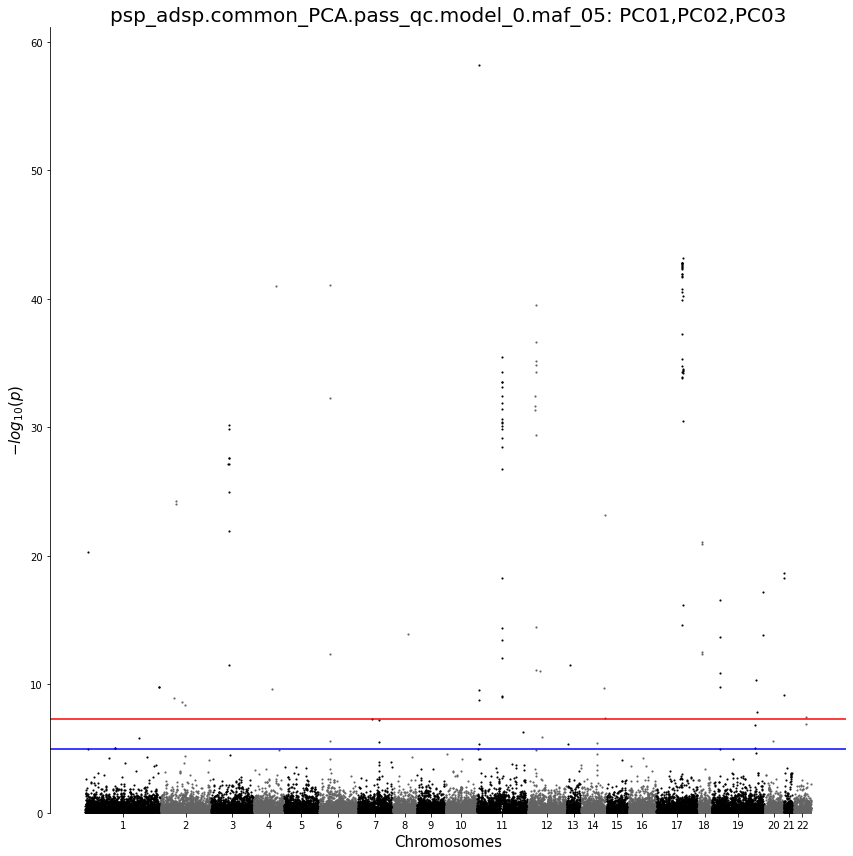

In [4]:
qqman.manhattan(file_plink_assoc+'.assoc', out=out_manhattan, show=True, title=MODEL_NAME + ': ' + COVAR_STR)

#### qqplot

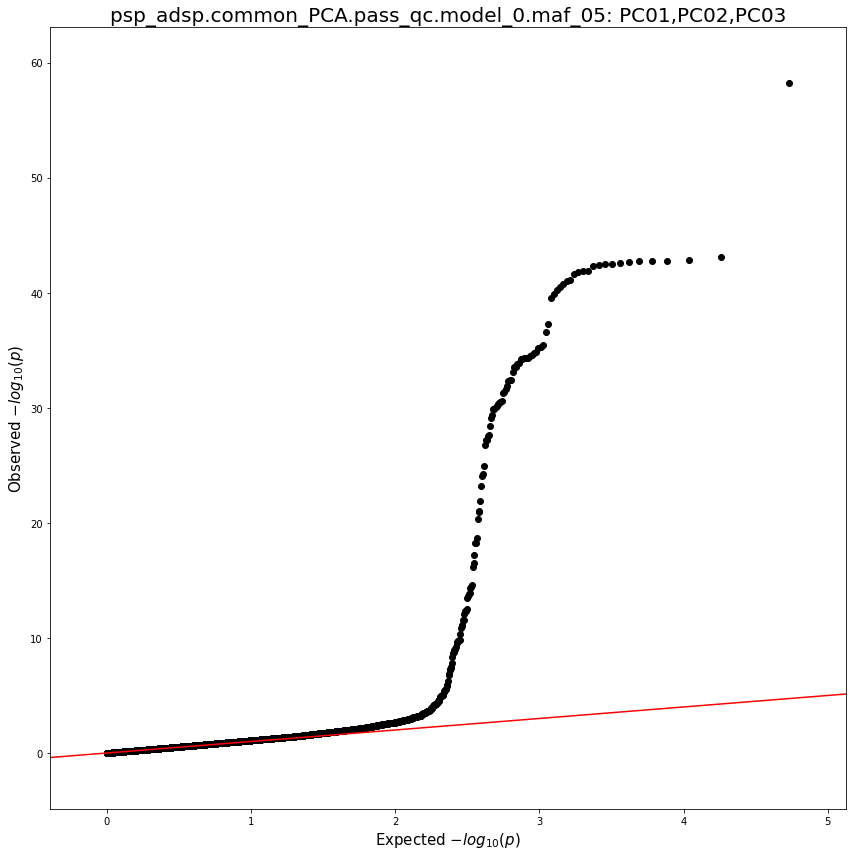

In [5]:
qqman.qqplot(file_plink_assoc+'.assoc', out=out_qqplot, show=True, title=MODEL_NAME + ': ' + COVAR_STR)

#### write plot files

In [6]:
qqman.manhattan(file_plink_assoc+'.assoc', out=out_manhattan, show=False, title=MODEL_NAME + ': ' + COVAR_STR)
qqman.qqplot(file_plink_assoc+'.assoc', out=out_qqplot, show=False, title=MODEL_NAME + ': ' + COVAR_STR)